In [1]:
import pickle
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style('whitegrid')
%matplotlib inline

from utilities import preProcessing

In [2]:
artist_data = pickle.load(open('../data/collection/Meek Mill.pkl', 'rb'))
LR_clf = pickle.load(open('LR_clf.pkl', 'rb'))
vec = pickle.load(open('vectorizer.pkl', 'rb'))

In [3]:
artist_data.keys()

dict_keys(['header_image_url', 'id', 'image_url', 'is_verified', 'name', 'url', 'iq', 'albums'])

In [4]:
print(len(artist_data['albums']))
artist_data['albums'][0].keys()

22


dict_keys(['_type', 'cover_art_thumbnail_url', 'cover_art_url', 'full_title', 'id', 'name', 'name_with_artist', 'url', 'date', 'tracks'])

In [5]:
print(len(artist_data['albums'][0]['tracks']))
artist_data['albums'][0]['tracks'][0].keys()

12


dict_keys(['number', '_type', 'full_title', 'header_image_thumbnail_url', 'header_image_url', 'id', 'lyrics_state', 'song_art_image_thumbnail_url', 'song_art_image_url', 'stats', 'title', 'title_with_featured', 'url', 'lyrics', 'description', 'embed_content', 'featured_video', 'recording_location', 'apple_music_id', 'apple_music_player_url', 'release_date', 'release_date_for_display', 'featured_artists', 'producer_artists', 'writer_artists', 'custom_performances', 'song_relationships'])

In [17]:
Albums = pd.DataFrame()
Tracks = pd.DataFrame()

for album in artist_data['albums']:
    album_data = {}
    album_data['album_id'] = album['id']
    album_data['name'] = album['name']
    album_data['release_date'] = album.get('date')
    album_data['type'] = album['_type']
    Albums = pd.concat(
        [Albums, pd.DataFrame.from_dict(album_data, orient='index').transpose()]
    )

    for track in album['tracks']:
        track_data = {}
        track_data['track_id'] = track['id']
        track_data['album_id'] = album['id']
        track_data['number'] = track['number']
        track_data['title'] = track['title']
        track_data['title_with_featured'] = track['title_with_featured']
        track_data['lyrics'] = track.get('lyrics')
        if track.get('lyrics'):
            track_data['mood'] = LR_clf.predict(vec.transform(pd.Series(preProcessing(track.get('lyrics')))))[0]
        else:
            track_data['mood'] = None
        Tracks = pd.concat(
            [Tracks, pd.DataFrame.from_dict(track_data, orient='index').transpose()]
        )

In [18]:
Albums

,album_id,name,release_date,type
0,541448,Dreamchasers 5,2021-01-01,album
0,702553,QUARANTINE PACK,2020-11-20,album
0,434670,Championships,2018-11-30,album
0,442779,Legends of the Summer,2018-07-06,album
0,338146,Wins & Losses,2017-07-21,album
0,353334,Meekend Music II,2017-07-04,album
0,343678,Meekend Music,2017-05-06,album
0,138044,DC4,2016-10-28,album
0,142966,4/4 2,2016-01-30,album
0,141986,4/4,2016-01-16,album


In [19]:
Tracks

,track_id,album_id,number,title,title_with_featured,lyrics,mood
0,5640533,541448,None,Otherside Of America,Otherside Of America,[Intro: Donald Trump]\nWhat do you have to los...,angry
0,6059373,541448,None,Don’t Worry (RIP Kobe),Don’t Worry (RIP Kobe) (Ft. Lil Baby),[Intro: Meek Mill]\nYeah\n\n[Verse 1: Meek Mil...,happy
0,5047212,541448,None,WE SLIDE,WE SLIDE (Ft. Young Thug),Lyrics from snippets\n\n[Intro: Meek Mill & Li...,sad
0,4786055,541448,None,Maxin,Maxin (Ft. Offset & Quavo),"[Intro: Meek Mill]\nYeah, ooh\nThese one of th...",angry
0,5297316,541448,None,Feel Today*,Feel Today* (Ft. Roddy Ricch),Lyrics from Snippet\n\n[Verse: Roddy Ricch]\n....,sad
...,...,...,...,...,...,...,...
0,4753302,75242,18,What time is it,What time is it,"[Intro]\nUh, uh, uh, uh\nIt's Meek motherfucki...",angry
0,4753303,75242,19,Drive slow,Drive slow,"[Intro]\nUh, uh, uh, uh\nIt's Meek motherfucki...",angry
0,4753304,75242,20,Bad man,Bad man,"[Intro]\nUh, uh, uh, uh\nIt's Meek motherfucki...",angry
0,4753305,75242,21,Hustla musik,Hustla musik,"[Intro]\nUh, uh, uh, uh\nIt's Meek motherfucki...",angry


In [20]:
Tracks['mood'].value_counts()

angry      173
sad         92
relaxed     28
happy       18
Name: mood, dtype: int64

In [21]:
df = pd.merge(
    Albums, 
    Tracks, 
    'left', 
    'album_id'
)
df.head()

,album_id,name,release_date,type,track_id,number,title,title_with_featured,lyrics,mood
0,541448,Dreamchasers 5,2021-01-01,album,5640533,None,Otherside Of America,Otherside Of America,[Intro: Donald Trump]\nWhat do you have to los...,angry
1,541448,Dreamchasers 5,2021-01-01,album,6059373,None,Don’t Worry (RIP Kobe),Don’t Worry (RIP Kobe) (Ft. Lil Baby),[Intro: Meek Mill]\nYeah\n\n[Verse 1: Meek Mil...,happy
2,541448,Dreamchasers 5,2021-01-01,album,5047212,None,WE SLIDE,WE SLIDE (Ft. Young Thug),Lyrics from snippets\n\n[Intro: Meek Mill & Li...,sad
3,541448,Dreamchasers 5,2021-01-01,album,4786055,None,Maxin,Maxin (Ft. Offset & Quavo),"[Intro: Meek Mill]\nYeah, ooh\nThese one of th...",angry
4,541448,Dreamchasers 5,2021-01-01,album,5297316,None,Feel Today*,Feel Today* (Ft. Roddy Ricch),Lyrics from Snippet\n\n[Verse: Roddy Ricch]\n....,sad


In [22]:
df_summ = pd.merge(
    df.groupby(['name', 'release_date'])[['album_id']].count().reset_index().rename(columns={'album_id': 'no_of_tracks'}),
    df.groupby(['name', 'mood'])[['album_id']].count().reset_index().rename(columns={'album_id': 'count'}),
    'left',
    'name'
)
df_summ['sentiment'] = df_summ['count'].div(df_summ['no_of_tracks']).mul(100).round(2)
df_summ.head()

,name,release_date,no_of_tracks,mood,count,sentiment
0,4/4,2016-01-16,4,angry,1,25.0
1,4/4,2016-01-16,4,relaxed,1,25.0
2,4/4,2016-01-16,4,sad,2,50.0
3,4/4 2,2016-01-30,4,angry,3,75.0
4,4/4 2,2016-01-30,4,sad,1,25.0


In [23]:
fig = plt.figure(figsize=(18, 8))
data = pd.pivot_table(df_summ, values = ['sentiment'], index=['name', 'release_date'], columns=['mood'], fill_value=0)

data.sort_index('index',1, inplace=True)
data

sentiment                      
mood                                          angry  happy relaxed    sad
name                         release_date                                
The Real Me                  2006-09-01       81.82   0.00    0.00  13.64
The Real Me 2                2006-12-01       50.00   0.00    0.00  50.00
Flamers                      2008-08-24       50.00   0.00    5.56  44.44
Flamers 2                    2009-02-24       50.00   4.17   12.50  33.33
Flamers 2.5: The Preview     2009-10-13       57.14   0.00    4.76  38.10
Flamers 3: The Wait Is Over  2010-03-12       51.85   3.70   18.52  25.93
Mr. Philadelphia             2010-08-25       50.00   0.00   20.83  29.17
Dreamchasers                 2011-08-11       55.56  16.67    5.56  22.22
Dreamchasers 2               2012-05-07       45.00  10.00   15.00  30.00
Dreams and Nightmares        2012-10-30       50.00  25.00    6.25  18.75
Dreamchasers 3               2013-09-29       41.18   5.88    5.88  47.06
Dreams Worth More Than Money 2015-06-29       37.50  12.50   12.50  37.50
4/4                          2016-01-16       25.00   0.00   25.00  50.00
4/4 2                        2016-01-30       75.00   0.00    0.00  25.00
DC4                          2016-10-28       35.71   0.00    7.14  57.14
Meekend Music                2017-05-06       66.67   0.00    0.00  33.33
Meekend Music II             2017-07-04       75.00   0.00    0.00  25.00
Wins & Losses                2017-07-21       63.16   5.26    5.26  26.32
Legends of the Summer        2018-07-06      100.00   0.00    0.00   0.00
Championships                2018-11-30       73.68   5.26    5.26  15.79
QUARANTINE PACK              2020-11-20      100.00   0.00    0.00   0.00
Dreamchasers 5               2021-01-01       58.33  16.67    8.33  16.67

<Figure size 1296x576 with 0 Axes>

In [24]:
# data.iloc[:, data.columns.get_level_values(1).isin(['angry'])]

In [25]:
out = pd.DataFrame()
for album in df_summ['name'].unique():
    filtered_df = df_summ[df_summ['name'] == album].copy()
    filtered_df['release_date'] = filtered_df['release_date'].map(str)
    out = pd.concat([out, pd.DataFrame(filtered_df[filtered_df['sentiment'] == filtered_df['sentiment'].max()])])
out.sort_values('release_date', inplace=True)
out

,name,release_date,no_of_tracks,mood,count,sentiment
59,The Real Me,2006-09-01,22,angry,18,81.82
61,The Real Me 2,2006-12-01,2,angry,1,50.00
62,The Real Me 2,2006-12-01,2,sad,1,50.00
36,Flamers,2008-08-24,18,angry,9,50.00
39,Flamers 2,2009-02-24,24,angry,12,50.00
43,Flamers 2.5: The Preview,2009-10-13,21,angry,12,57.14
46,Flamers 3: The Wait Is Over,2010-03-12,27,angry,14,51.85
55,Mr. Philadelphia,2010-08-25,24,angry,12,50.00
12,Dreamchasers,2011-08-11,18,angry,10,55.56
16,Dreamchasers 2,2012-05-07,20,angry,9,45.00


<AxesSubplot:xlabel='release_date', ylabel='sentiment'>

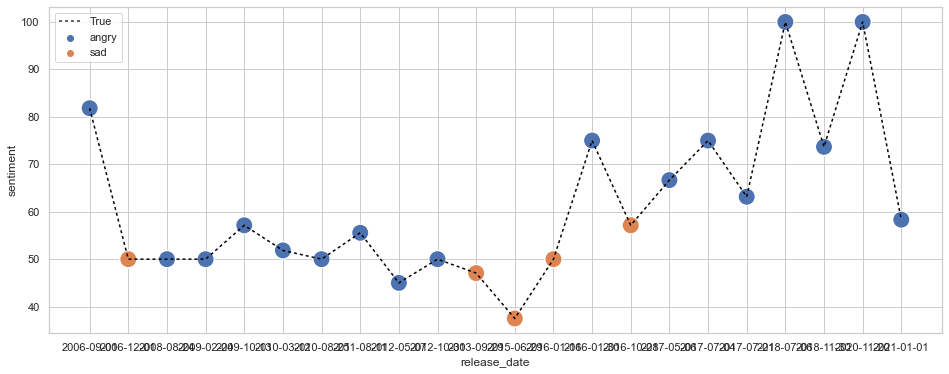

In [26]:
fig = plt.figure(figsize = (16, 6))
sns.scatterplot(data = out, x = 'release_date', y = 'sentiment', hue = 'mood', s = 300)
sns.lineplot(data = out, x = 'release_date', y = 'sentiment', color='black', style=True, dashes=[(2,2)])

In [16]:
# 

In [18]:
# 